<h1><center><b>Data Analysis Using Statistical Methods</b></center> </h1>
<h2><center>Case Study of Categorizing Maternal Health Risk during Pregnency </center></h2>
<h3><center>Bhargavi Katta</center></h3>
<h3><center>Department of Mathematical Sciences, Stevens Institute of Technology, Hoboken, NJ</center></h3>
<h3><center> Project Supervisor: Dr. Hadi Safari Katesari</center></h3>
    

<br>

<b><h2>Abstract :</h2></b>

<p>Statistical analysis is the process of collecting and analyzing data to identify patterns and trends to make informed decision-making.The end goal is to implement various statistical methods on Maternal health risk dataset to get accurate predictions on risklevel. The accuracy metric used in the project give us <b> Accuracy: 91% </b>and a good <b>Recall Score of ~96%</b>  when used regularization with Logestic regression. As we know Recall rate is very import particulay for medical/ health data and here I achieved good recall score.</p>


<h2><b> CH1 Introduction :</b></h2>

<p>The main idea behind this project is to implement statistical methods during analysis of real data. 
This includes and is not limited to F-test, Fisher information, ANOVA Analysis, Chi Squared Tests of Independence various distributions, categorical analysis of data, and classification models.<br>
<br>
To achieve this, I am using "Maternal Health Risk Data" from Kaggle . First, I will implement various statistical methods to identify correlations among features and dependencies between the various features of data. Next,I will be implementing Forward and Backward elimination methods to select the best features from our data to fit a logistic regression model to test the accuracy on test data. Then, I will implement PCA on the data set to reduce features and finally will conclude tha whole Analysis.</p>



## CH2: Methodology

I got the opportunity to implement below statistical methods to understand the data and the hidden trends.

Man whitney test to compare the differnt independent samples in the dataset,  Kruskal wallis test for one way analysys of features variance . Since all the features does not have same means I used Nemenyi Test to find which features are statistically different.

Then I used chi-square test of independence to analyse the categorical data. Then for feature selection I implemented forward  selection,backward selection and fishers score of the features and found most important features which have significant impact on target variable. Then I implemented bootstrap and kfold cross validation methods to understand the samples and their estimations.

Then I implemented Logestic Regression on the features provided by forward selectiona and backward selection methods and also applied Logesstic Regression with regularization factor and which gave the best aaccuracy and recall score compare to all other methods with Logestic regression classifeir.Finally implemented PCA to reduce the dimention of the data.


<h2><b> CH3: Data Description:</b></h2>

   
Source: https://www.kaggle.com/datasets/drmbsharma/maternal-health-risk-data-set?resource=download

Data features:
 - Age: Age in years when a women is pregnant.
 - SystolicBP: Upper value of Blood Pressure in mmHg, another significant attribute during pregnancy.
 - DiastolicBP: Lower value of Blood Pressure in mmHg, another significant attribute during pregnancy.
 - BS: Blood glucose levels is in terms of a molar concentration, mmol/L.
 - HeartRate: A normal resting heart rate in beats per minute.
 - Risk Level: Predicted Risk Intensity Level during pregnancy considering the previous attribute.


### Loading Required Libraries

In [2]:
import numpy as np
import pandas as pd
import scipy as sc
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import kruskal,mannwhitneyu,chi2, chi2_contingency
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression, LinearRegression;
from sklearn.preprocessing import StandardScaler 
import warnings
warnings.filterwarnings('ignore')
import pandas.util.testing as tm
from sklearn import metrics 
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from pingouin import multivariate_normality
from sklearn.utils import resample # for Bootstrap sampling
from sklearn.model_selection import train_test_split,KFold, LeaveOneOut,cross_val_score;
import scikit_posthocs as sp
from scipy import stats
from scipy.stats import chi2

### Load the Data set

In [5]:
os.chdir('/Users/gopalrao000/Desktop/Bhargavi/Fall-22/MA-541')

In [105]:
data=pd.read_csv('maternal.csv')
df = data.copy(deep=True)
df1=data.copy(deep=True)




In [7]:
data.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


Looking at the head/sample of the dataset, we can see that there are six columnswhich are numerical that we can use to predict the RiskLevel. Since we want to predict the risklevel, which is a categorical variable.
We will use logistic regression classifier.




In [8]:
# healthy women stats: Systolic 120 Diastolic 80 BS:7.8 Heart rate:78-82 beatsper min

In [9]:
data.shape

(808, 7)

Data set has total 6 independen features and one dependednt feature with total 808 entries of  data.

## Data Preprocessing

In [10]:
data.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000
mean,30.585396,112.972772,77.500000,9.264839,98.640347,74.297030
std,13.922075,19.924312,14.772207,3.617635,1.386501,8.822686
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,90.000000,65.000000,7.000000,98.000000,70.000000
50%,27.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,40.000000,120.000000,90.000000,11.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [11]:
result = data.dtypes

print("Columns and their data type:")
print(result)

Columns and their data type:
Age              int64
SystolicBP       int64
DiastolicBP      int64
BS             float64
BodyTemp       float64
HeartRate        int64
RiskLevel       object
dtype: object


Convert the independent column to categorical data to make it easy while applying models

In [12]:
data["RiskLevel"] = data["RiskLevel"].astype('category')

<b>Check for the null values</b><br>
Fortunately there are no null/missing values in data

In [13]:
check_null_values=data.isnull().sum(axis=0)
check_null_values

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [14]:
data.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000
mean,30.585396,112.972772,77.500000,9.264839,98.640347,74.297030
std,13.922075,19.924312,14.772207,3.617635,1.386501,8.822686
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,90.000000,65.000000,7.000000,98.000000,70.000000
50%,27.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,40.000000,120.000000,90.000000,11.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [15]:
corr_matrix = data.corr()
corr_matrix

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
Age,1.000000,0.459576,0.440481,0.470890,-0.293673,0.093484
SystolicBP,0.459576,1.000000,0.866559,0.487461,-0.303682,0.028800
DiastolicBP,0.440481,0.866559,1.000000,0.438310,-0.287651,0.025101
BS,0.470890,0.487461,0.438310,1.000000,-0.124890,0.172422
BodyTemp,-0.293673,-0.303682,-0.287651,-0.124890,1.000000,0.021143
HeartRate,0.093484,0.028800,0.025101,0.172422,0.021143,1.000000


## Data Visualization

In [16]:
le = LabelEncoder()
level = le.fit_transform(data['RiskLevel'])
data['RiskLevel']=level
# high risk=0 Low Risk=1

<h2> RiskLevel</h2>

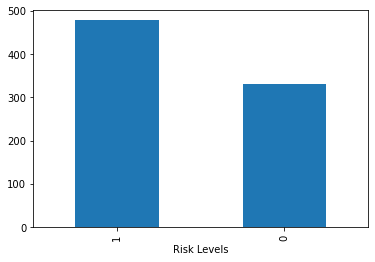

In [17]:
risk_data = data.RiskLevel.value_counts().plot.bar()
risk_data.set_xlabel('Risk Levels');

<b>
    
 - High risk Data:41%
    
 - Low Risk Data:59%
</b>

<h2>AGE</h2>

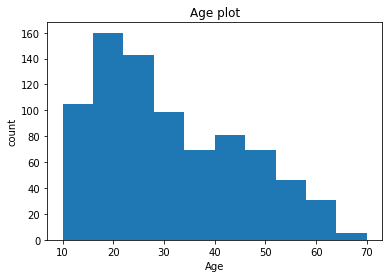

In [18]:
plt.hist(data.Age)
plt.title("Age plot")
plt.xlabel("Age")
plt.ylabel("count")
plt.show()


We could see that age starts from 10 and ends at 70 with most of the ages from 15 to 25.

<h2> Visualizing RiskLevel categories with respect to all other features</h2>

<h4>RiskLevel v/s Age</h4>

<AxesSubplot:xlabel='RiskLevel', ylabel='Age'>

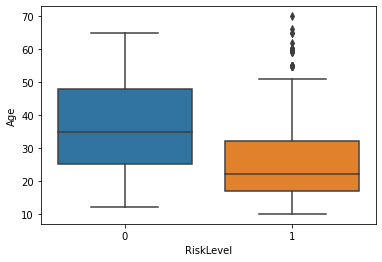

In [19]:
sns.boxplot(data=data,x='RiskLevel',y='Age')

<h4>RiskLevel v/s Systolic BP</h4>

<AxesSubplot:xlabel='RiskLevel', ylabel='SystolicBP'>

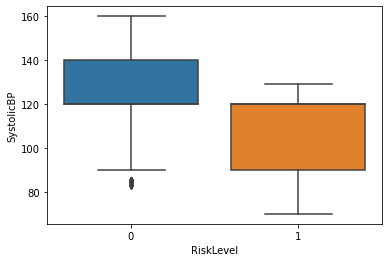

In [20]:
sns.boxplot(data=data,x='RiskLevel',y='SystolicBP')

<h4>RiskLevel v/s Diastolic BP</h4>

<AxesSubplot:xlabel='RiskLevel', ylabel='DiastolicBP'>

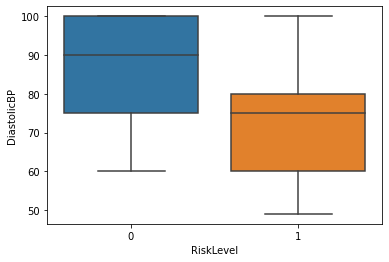

In [21]:
sns.boxplot(data=data,x='RiskLevel',y='DiastolicBP')

<h4>RiskLevel v/s Blood Sugar</h4>

<AxesSubplot:xlabel='RiskLevel', ylabel='BS'>

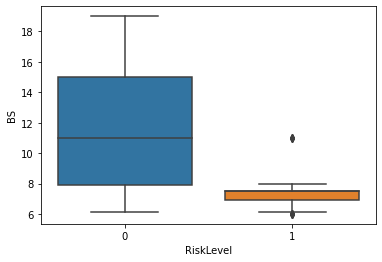

In [22]:
sns.boxplot(data=data,x='RiskLevel',y='BS')


<h4>RiskLevel v/s BodyTemparature</h4>

<AxesSubplot:xlabel='RiskLevel', ylabel='BodyTemp'>

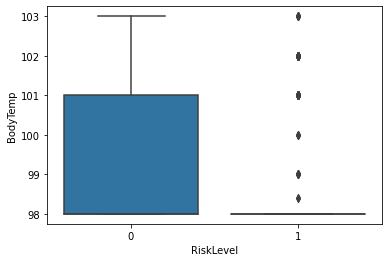

In [23]:
sns.boxplot(data=data,x='RiskLevel',y='BodyTemp')

<h4>RiskLevel v/s Heart Rate</h4>

<AxesSubplot:xlabel='RiskLevel', ylabel='HeartRate'>

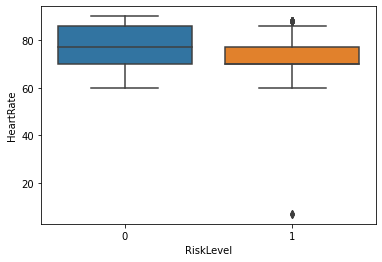

In [24]:
sns.boxplot(data=data,x='RiskLevel',y='HeartRate')

<h4>All features in single plot</h4>

<AxesSubplot:>

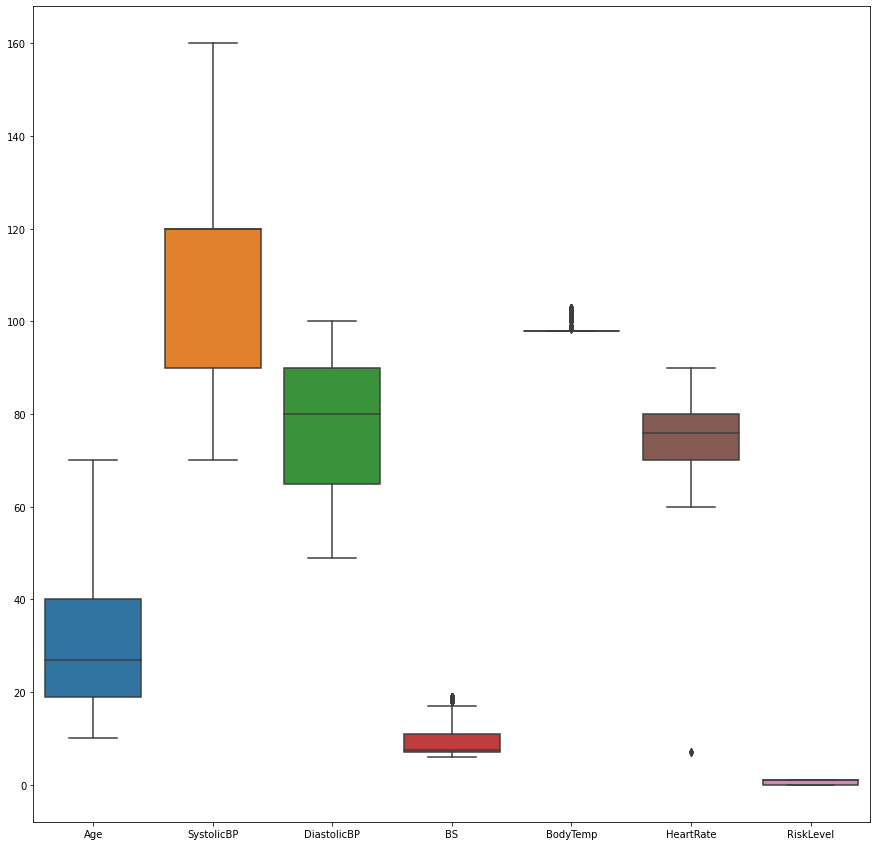

In [25]:
fig = plt.figure(figsize =(15, 15))
sns.boxplot(data=data)

array([[<AxesSubplot:title={'center':'Age'}, xlabel='[RiskLevel]'>,
        <AxesSubplot:title={'center':'BS'}, xlabel='[RiskLevel]'>],
       [<AxesSubplot:title={'center':'BodyTemp'}, xlabel='[RiskLevel]'>,
        <AxesSubplot:title={'center':'DiastolicBP'}, xlabel='[RiskLevel]'>],
       [<AxesSubplot:title={'center':'HeartRate'}, xlabel='[RiskLevel]'>,
        <AxesSubplot:title={'center':'SystolicBP'}, xlabel='[RiskLevel]'>]],
      dtype=object)

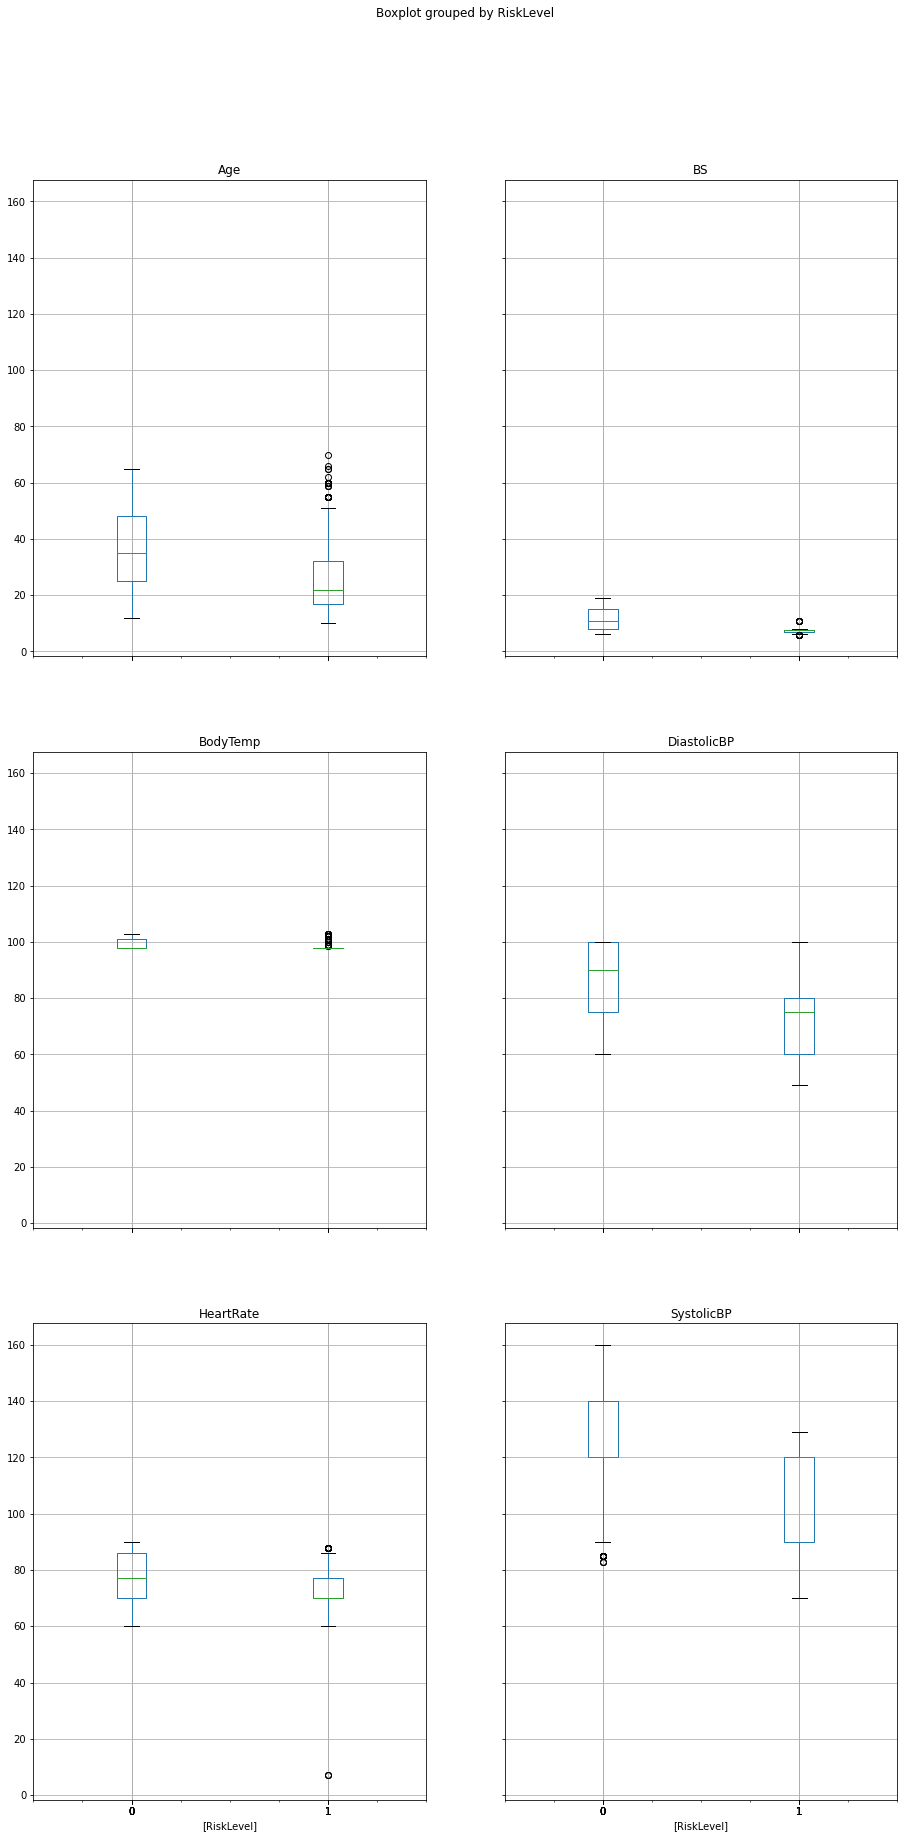

In [26]:

data.boxplot(by='RiskLevel',figsize=(15,30))

# Chapter 4

# Check if the data is normally distributed or not

This is a hypotheses test and the two hypotheses are as follows:

--> H0 (accepted): The variables follow a multivariate normal distribution..(Po>0.05)

--> Ha (rejected): The variables do not follow a multivariate normal distribution.

In [27]:
multivariate_normality(data, alpha=.05)

HZResults(hz=14.302312865662838, pval=0.0, normal=False)

<font color=green>
<b> Output Interpretation:</b>

Since the p-value is 0.0 which is less than  alpha(0.5) 
we will reject the null hypothesis and Accept Alternate Hypothesis

So The variables do not follow a multivariate normal distribution.
   

<br>

In [28]:
data.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,0
1,35,140,90,13.0,98.0,70,0
2,29,90,70,8.0,100.0,80,0
3,30,140,85,7.0,98.0,70,0
4,35,120,60,6.1,98.0,76,1


In [29]:
data['Age_cat'] = pd.cut(data['Age'],
                      bins=[0, 20,40, 70],
                      labels=['young','Adult','old'])

In [30]:
# Converting age to categorical data 
data['Age_cat'] = pd.cut(data['Age'],
                      bins=[0, 20,40, 70],
                      labels=['young','Adult','old'])
le = LabelEncoder()
level = le.fit_transform(data['Age_cat'])
data['age_cat_encode']=level

In [31]:
# Converting All features to categorical data 
data['Age_cat'] = pd.cut(data['Age'],
                      bins=[0, 20,40, 70],
                      labels=['young','Adult','old'])
le = LabelEncoder()
level = le.fit_transform(data['Age_cat'])
data['age_cat_encode']=level

data['systolic_cat'] = pd.cut(data['SystolicBP'],
                      bins=[0, 90, 130,200],
                      labels=['low', 'normal', 'high'])

le = LabelEncoder()
level = le.fit_transform(data['systolic_cat'])
data['sbp_onehot']=level

data['diasstolic_cat'] = pd.cut(data['DiastolicBP'],
                      bins=[0, 60, 85,110],
                      labels=['low', 'normal', 'high'])
le = LabelEncoder()
level = le.fit_transform(data['diasstolic_cat'])
data['dbp_onehot']=level

data['HR_cat'] = pd.cut(data['HeartRate'],
                      bins=[0, 75,100],
                      labels=['lessthan75','morethan75'])
le = LabelEncoder()
level = le.fit_transform(data['HR_cat'])
data['HR_cat_onehot']=level



In [32]:
data.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,Age_cat,age_cat_encode,systolic_cat,sbp_onehot,diasstolic_cat,dbp_onehot,HR_cat,HR_cat_onehot
0,25,130,80,15.0,98.0,86,0,Adult,0,normal,2,normal,2,morethan75,1
1,35,140,90,13.0,98.0,70,0,Adult,0,high,0,high,0,lessthan75,0
2,29,90,70,8.0,100.0,80,0,Adult,0,low,1,normal,2,morethan75,1
3,30,140,85,7.0,98.0,70,0,Adult,0,high,0,normal,2,lessthan75,0
4,35,120,60,6.1,98.0,76,1,Adult,0,normal,2,low,1,morethan75,1


# 4.1
# Comparing Two sample
## A Non parametric Method-The Mann-Whitney Test

Nonparametric statistics are those methods that do not assume that data is following any specific distribution.. Since our samples are independent and we have an unknown distribution, So  we can use  Mann-Whitney Test (Wilcoxon rank sum test)

Mann-Whitney test is used for comparing  two different independent groups.
It tests the hypothesis that if the two groups are from same population or have the same medians.
It does not assume any specific distribution while calculating test statistics and p values.

<b> Hypothesis </b>
This is a hypotheses test and the two hypotheses are as follows with aplha=0.5:

--> H0 (accepted): The samples are from same distribution and they have same mean.

--> Ha (rejected): The samples are not from same distribution and thye do not have same mean.

In [33]:
stat, p = mannwhitneyu(data.RiskLevel, data.age_cat_encode) 
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')


Statistics=290797.000, p=0.000
Different distribution (reject H0)


<font color=green>
Conclusion:
    
 - [p < Alpha]  and also test Statistic is greater than Zvalue of 0.05 from Z-table: Reject null Hypothesis        
 - Means Samples are following different distributions and their means are not same
              
 
 - Man whitney test was applied to all other converted categorical features and all are following different       distributions
              
<b>Therefore None of the independent feature and dependent feature is following same distribution</b>

# CH. 4.2
# ONE WAY ANOVA 
## KURSKAL-WALLIS TEST -Data is non parametric


### A Non parametric Method-The Kruskal-Walis Test (one-way analysis of variance or one-way ANOVA)

If more than 2 columns/groups need to be analysed, we will use Kruskal-Wallis test.The K −W Test is a generalization of M −W test that observations are assumed to be independent but no particular distribution from, such as normal, is assumed. The obs are pooled together and ranked

This is a hypotheses test and the two hypotheses are as follows with aplha=0.5:
 -  H0 (accepted): The samples are following same distribution.
 - Ha (rejected): The samples are not following same distribution.

In [34]:
stat, p = kruskal(data.Age,data.BodyTemp,data.HeartRate,data.SystolicBP, data.DiastolicBP, data.BS,data.RiskLevel)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=5188.758, p=0.000


In [35]:
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Different distributions (reject H0)


<font color=green>

Conclusion: Statistic is grater than Z value of 0.05 and also p-value is less than Aplha i.e0.05.
 - so we have sufficient evidence to say that the mean values across each group are not equal.
 - However, we are unclear that which groups are different from each other. It simply tells us that not all of the group means are equal. In order to find out exactly which groups are different from each other, we must conduct a post hoc test.
   
Thus, we can perform  Nemenyi Test to determine exactly which group means are different.

   

<h3> Nemenyi Test</h3>

In [37]:

 
# Combine three groups into one array
data1 = np.array([data.Age,data.BodyTemp,data.HeartRate,data.SystolicBP, data.DiastolicBP, data.BS,data.RiskLevel])
 
# Conduct the Nemenyi post-hoc test
sp.posthoc_nemenyi_friedman(data1.T)

,0,1,2,3,4,5,6
0,1.000,0.001,0.00100,0.001,0.00100,0.001,0.001
1,0.001,1.000,0.00100,0.001,0.00100,0.001,0.001
2,0.001,0.001,1.00000,0.001,0.45174,0.001,0.001
3,0.001,0.001,0.00100,1.000,0.00100,0.001,0.001
4,0.001,0.001,0.45174,0.001,1.00000,0.001,0.001
5,0.001,0.001,0.00100,0.001,0.00100,1.000,0.001
6,0.001,0.001,0.00100,0.001,0.00100,0.001,1.000


<font color=green>
    <b> Conclusion:</b>
For α = 0.05 there are only two groups that seem to have statistically significantly same mean which are<b> Heart Rate and Diastolic BP.</b>

Except these two remaining all features means are statistically different.

# CH 4.3
# CATEGORICAL DATA ANALYSIS

since data does not have categorical feature with only 2 levels we can not use Fisher testSo we will use chi square test of Homogenity

CHI SQUARED TEST OF INDEPENDENCE:
Chi-square test for independence is often used to examine independence between two categorical variables which has more than 2 levels.


For our Chi-square test for independence here, the null hypothesis is that there is no significant relationship between ‘BP’ and ‘Risk’.

The alternative hypothesis is that there is significant relationship between ‘BP’ and ‘Risk’.

For  Chi-square test for independenc:

 -  H0 (accepted): There is no Association between two  variables.

 -  Ha (rejected): There is an Association between two  variables.

In [39]:
ct = pd.crosstab(data.systolic_cat, data.RiskLevel, margins=True)

<h3>Categorical Analysis of StstolicBP and RiskLevel</h3>

In [41]:
crosstab = pd.crosstab(data["systolic_cat"], data["RiskLevel"])
#chisquare(2)=260.920 from test and chisquare(2) for 0.05from chi table:5.991

In [42]:
def ChiSqTest(cross):
    stat, p, dof, expected = chi2_contingency(cross)
    prob = 0.95
    critical = chi2.ppf(prob, dof)
    print("P value",p)
    print("critical-chisquare value from table",critical)
    print("Test Statistic",stat)
    if abs(stat) >= critical:
        print('Dependent-> There is Association between these variables (reject H0)')
    else:
        print('Independent-> No Association (fail to reject H0)')

In [43]:
ChiSqTest(crosstab)

P value 2.1965336868836304e-57
critical-chisquare value from table 5.991464547107979
Test Statistic 260.920939559451
Dependent-> There is Association between these variables (reject H0)


<font color=green>
    
Conclusion:
 - pvalue <(alpha) i.e 0.05  and test stastistic is grater than chisquare value from the chi table.
 - hence reject H0
 - Implies: There is Association between two variables
    
<b>As tested for all other variables, All independent features in the dataset has Association with RiskLevel</b>

In [44]:
crosstab1 = pd.crosstab(data["diasstolic_cat"], data["RiskLevel"])
ChiSqTest(crosstab1)
crosstab2 = pd.crosstab(data["Age_cat"], data["RiskLevel"])
ChiSqTest(crosstab2)
crosstab3 = pd.crosstab(data["HR_cat"], data["RiskLevel"])
ChiSqTest(crosstab3)



P value 2.515141838684496e-28
critical-chisquare value from table 5.991464547107979
Test Statistic 127.10010680956117
Dependent-> There is Association between these variables (reject H0)
P value 6.282812035469599e-12
critical-chisquare value from table 5.991464547107979
Test Statistic 51.586406918643384
Dependent-> There is Association between these variables (reject H0)
P value 8.299514517878288e-06
critical-chisquare value from table 3.841458820694124
Test Statistic 19.86759852998465
Dependent-> There is Association between these variables (reject H0)



# 4.5  Feature Selection 

<h2> By using Fisher Score</h2>

Fisher Score (chi-square implementation)
It computes chi-squared stats between each non-negative feature and class.
This score can be used to evaluate categorical variables in a classification task.
It compares the observed distribution of the different classes of target Y among the different categories of the feature, 
against the expected distribution of the target classes, regardless of the feature categories.
We will use this to select the K best features based on Fisher score.

In [46]:
target=data['RiskLevel']
train_data=data[['Age','SystolicBP','DiastolicBP','BS','BodyTemp','HeartRate']].astype(int).copy()
fvalue_selector = SelectKBest(f_classif, k=4)
X_kbest = fvalue_selector.fit_transform(train_data,target)
print('Original number of features:', train_data.shape[1])
print('Reduced number of features:', X_kbest.shape[1])

Original number of features: 6
Reduced number of features: 4


In [47]:
X_kbest

array([[ 25, 130,  80,  15],
       [ 35, 140,  90,  13],
       [ 29,  90,  70,   8],
       ...,
       [ 19, 120,  76,   7],
       [ 40, 160, 100,  19],
       [ 32, 140,  90,  18]])

<font color=green>
Best 4 features selected using fisher score are:
 
 - Age
 - Systolic BP
 - Diastolic BP
 - Bllod Sugar
<font>

### split data into train and test data with 20% test data

In [48]:
x_train, x_test, y_train, y_test = train_test_split(data.drop(labels=['RiskLevel'], axis=1), data['RiskLevel'], test_size=0.2, random_state=0)

In [50]:
x_train_num=x_train.drop(labels=['systolic_cat','sbp_onehot','Age_cat','age_cat_encode','diasstolic_cat','HR_cat','dbp_onehot'],axis=1)

In [53]:

x_test_num=x_test.drop(labels=['systolic_cat','sbp_onehot','Age_cat','age_cat_encode','diasstolic_cat','HR_cat','dbp_onehot'],axis=1)


In [55]:
y_train=y_train.astype('category')
x_train=x_train.astype('category')

In [56]:
scaler = StandardScaler()

In [57]:
x_train_num = scaler.fit_transform(x_train_num)
x_test_num = scaler.fit_transform(x_test_num)


#  4.4


In [58]:
x_test_num = scaler.fit_transform(x_test_num)

In [59]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression

# Logistic regression

In [100]:
model = LogisticRegression()
model.fit(x_train_num, y_train)
pred=model.predict(x_test_num)
print("Accuracy:",metrics.accuracy_score(y_test, pred))
r2 = r2_score(y_test,pred)
print("R^2 score:",r2)



Accuracy: 0.5617283950617284
R^2 score: -0.8070699135899448


<font color=green>
 Analysis:
    
  - Accuracy of logistic regression: 0.87
  - R^2 score of logestic regression: 0.47

When Implemented <b> Linear regression classifier over the data, acuuracy is 85% </b>


<h2>Feature selection by using Resampling methods</h2>

<h3>Forward Selection using Logestic regression</h3>

Forward selection is a greedy type algorithm that starts with an empty set of features and 
adds features one by one until when all remaining variables have a p-value above some
threshold.
In general it will add the most important feature which has great impact on the target value at each step.
 -  It is very useful  to know which features are having great impact on the target
 -  Simple and easy to implement but can be computationally expensive

In [61]:
# Logestic regression with forward feature selection

log_reg=LogisticRegression()

sfs1 = sfs(log_reg, k_features=5,forward=True, floating=True, verbose=2, scoring='r2', cv=3)
sfs_tr = sfs1.fit(np.array(x_train_num), y_train)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s finished

[2022-12-16 20:19:42] Features: 1/5 -- score: 0.4168963651226785[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s finished

[2022-12-16 20:19:42] Features: 2/5 -- score: 0.475091246128516[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=

In [63]:
#sfs_tr.k_feature_idx
print('Selected features:', sfs_tr.k_feature_idx_)

Selected features: (0, 1, 2, 3, 4)


#### On Test Data

In [64]:
X_train_sfs = sfs1.transform(x_train_num)
X_test_sfs = sfs1.transform(x_test_num)

# Fit the estimator using the new feature subset
# and make a prediction on the test data
log_reg.fit(X_train_sfs, y_train)
y_pred = log_reg.predict(X_test_sfs)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
r2 = r2_score(y_test,y_pred)
print("R^2 score:",r2)



Accuracy: 0.8765432098765432
R^2 score: 0.5034482758620691


<font color=green>
Conclusion:
    
Best four features selected by the Forward selection model are:
 - Age,
 - Systolic  BP,
 - Diastolic BP,
 - Blood sugar,
 - Body temparature
    
When Logestic regression model was implemented with features given by Forward selection model,
Accuracy increased to 87%

### Backward Selection using Logestic regression

Backward selection is another approach that starts with a complete set of features and removes 
features one by one( which has highest p value) until it reaches the s topping criteria or
when all the features has P values less than some threshold.
This method is more computationally efficient.

In [65]:
sfs1 = sfs(log_reg, k_features=5,forward=False, floating=True, verbose=2, scoring='r2', cv=3)
sfs_tr = sfs1.fit(np.array(x_train_num), y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s finished

[2022-12-16 20:19:49] Features: 6/5 -- score: 0.5075587486903159[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s finished

[2022-12-16 20:19:49] Features: 5/5 -- score: 0.4881408817196873

In [66]:
#sfs_tr.k_feature_idx
print('Selected features:', sfs_tr.k_feature_idx_)

Selected features: (0, 1, 3, 4, 5)


<font color=green>
Best four features selected by the backward selection model are:
    
 - Age,
 - Systolic  BP,
 - Bllod sugar,
 - Body temparature
</font>

In [67]:
X_train_sfs1 = sfs1.transform(x_train_num)
X_test_sfs1 = sfs1.transform(x_test_num)

# Fit the estimator using the new feature subset
# and make a prediction on the test data
log_reg.fit(X_train_sfs1, y_train)
y_pred = log_reg.predict(X_test_sfs1)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) 
r2 = r2_score(y_test,pred)
print(" R^2 score:",r2)



Accuracy: 0.8641975308641975
 R^2 score: 0.47862068965517257


<font color=green>

    
Best four features selected by the Backward selection model are:
 - Age,
 - Systolic  BP,
 - Blood sugar,
 - Body temparature
 - Heart Rate
    
When Logestic regression model was implemented with features selected by Backward selection model,
Accuracy increased to 87.65% from 87%

<font color=blue>
 <b> Conclusion:<b><br>
from the above two methods i,e forward and backward selection we can conclude that all the features are having significant impact on the target variable 'Risk Level' except Diastolic BP and heart rate as the forward seletion method selected Diastolic BP as the 5th important variable where as backead selection method selected heart rate as the 5th important feature

 - Accuracy for Forward selection model with 5 best features is 87%
 - Accuracy for Backward selection model with 5. best features is 86%
</font>

##  Cross Validation and Bootstrap

### Bootstrap

In [68]:
le = LabelEncoder()
level = le.fit_transform(df['RiskLevel'])
df['RiskLevel']=level

In [69]:
values=df.values

In [70]:
n_iterations = 10  #No. of bootstrap samples to be repeated (created)
n_size = int(len(df) * 0.50) #Size of sample, picking only 50% of the given data in every bootstrap sample


In [71]:

stats = list()
for i in range(n_iterations):

    #prepare train & test sets
    train = resample(values, n_samples = n_size) #Sampling with replacement..whichever is not used in training data will be used in test data
    test = np.array([x for x in values if x.tolist() not in train.tolist()]) #picking rest of the data not considered in training sample
    
    #fit model
    model = LogisticRegression()
    model.fit(train[:,:-1], train[:,-1]) #model.fit(X_train,y_train) i.e model.fit(train set, train label as it is a classifier)
    
    #evaluate model
    predictions = model.predict(test[:,:-1]) #model.predict(X_test)
    score = accuracy_score(test[:,-1], predictions) #accuracy_score(y_test, y_pred)
    #score=r2_score(test[:,-1], predictions)
    
    
    print(score)
    stats.append(score)

0.8760683760683761
0.8789237668161435
0.882051282051282
0.821256038647343
0.8808510638297873
0.9289340101522843
0.8497652582159625
0.85
0.8785046728971962
0.8605769230769231


<font color=green>
Here each Bootstrap iteration sample would create one model and this model is tested against the Out of Bag (test data) of that sample, i.e we will test sample with the test sample not part of that sample.
<br>
<br>
Thus we obtain ACUURACY scores for 10 samples.


<Figure size 720x360 with 0 Axes>

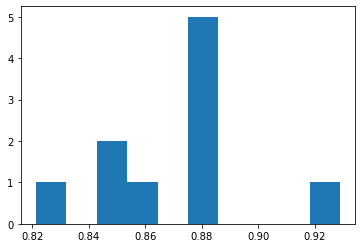

<Figure size 720x360 with 0 Axes>

In [72]:
plt.hist(stats)
plt.figure(figsize = (10,5))

# K Fold cross validation

In [73]:
from numpy import mean
from numpy import std

In [75]:
#Create separate arrays such that only values are considered as X, y
values = data.values



In [76]:
le = LabelEncoder()
level = le.fit_transform(df['RiskLevel'])
df['RiskLevel']=level

In [78]:
x=df.iloc[:,0:6].values
y=df.iloc[:,6:].values

In [80]:
y=y.ravel()

In [81]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
model = LogisticRegression(random_state = 0,multi_class='multinomial', solver='lbfgs',max_iter=1000)
scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [82]:
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.887 (0.034)


In [83]:
#Testing to find. better K value

In [84]:
model = LogisticRegression(random_state = 0,multi_class='multinomial', solver='lbfgs',max_iter=1000)
mean_score={}
for i in range(2,20):
    cv = KFold(n_splits=i, random_state=1, shuffle=True)
    scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
    mean_score[i]=(mean(scores))
    



In [85]:
for k, v in mean_score.items():
    print(" folds=",k," Mean Score value:", v)

 folds= 2  Mean Score value: 0.8948019801980198
 folds= 3  Mean Score value: 0.8873743632107945
 folds= 4  Mean Score value: 0.8849009900990099
 folds= 5  Mean Score value: 0.8861437006364543
 folds= 6  Mean Score value: 0.8861341440943432
 folds= 7  Mean Score value: 0.8911008781323624
 folds= 8  Mean Score value: 0.8886138613861386
 folds= 9  Mean Score value: 0.887404633097517
 folds= 10  Mean Score value: 0.8874537037037037
 folds= 11  Mean Score value: 0.8849079465517821
 folds= 12  Mean Score value: 0.8860477026631548
 folds= 13  Mean Score value: 0.8872740163062744
 folds= 14  Mean Score value: 0.8861161524500908
 folds= 15  Mean Score value: 0.8836943862101094
 folds= 16  Mean Score value: 0.884828431372549
 folds= 17  Mean Score value: 0.8860294117647058
 folds= 18  Mean Score value: 0.8873737373737373
 folds= 19  Mean Score value: 0.8860231975287054


In [86]:
min_value=min(mean_score.values())
min_key=min(mean_score,key=mean_score.get)
print(" best fold is: ",min_key,"with Accuracy of",min_value)

 best fold is:  15 with Accuracy of 0.8836943862101094


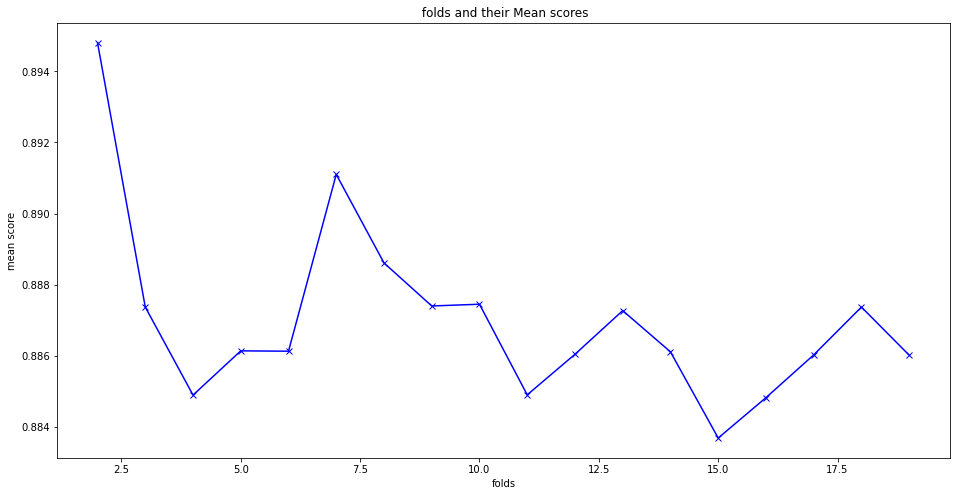

In [87]:
folds = list(mean_score.keys())           
score = list(mean_score.values())        
plt.figure(figsize=(16,8))
plt.plot(folds, score, 'bx-')
plt.xlabel('folds')
plt.ylabel('mean score')
plt.title(' folds and their Mean scores')
plt.show()

<font color=green>

<b>Conclusion:Optimal K fold here is 5. with means score of 0.8861.</b>


#  4.6
# Linear Model Selection and Regularization

<b>Regularization</b>

This is a form of regression, that constrains/ regularizes or shrinks the coefficient estimates towards zero. In other words, this technique discourages learning a more complex or flexible model, so as to avoid the risk of overfitting.

Ridge(L2) Regularization, also called a ridge regression, adds the “squared magnitude” of the coefficient as the penalty term to the loss function.

In [88]:
#L2 regularization
X=df.drop(['RiskLevel'],axis=1)
y=df['RiskLevel']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regularized_lr=LogisticRegression(penalty='l2',solver='newton-cg',max_iter=200)
regularized_lr.fit(X_train,y_train)
reg_pred=regularized_lr.predict(X_test)

In [89]:
print("Accuracy:",metrics.accuracy_score(y_test, reg_pred)) 
r2 = r2_score(y_test,reg_pred)
print("R^2 score:",r2)
conf_matrix=confusion_matrix(y_test,reg_pred)
print(" ")
print("Confusion Matrix")
print(conf_matrix)
print("precision score:", precision_score(y_test,reg_pred))
print("Recall:" ,recall_score(y_test,reg_pred))

Accuracy: 0.9135802469135802
R^2 score: 0.6436763550667715
 
Confusion Matrix
[[57 10]
 [ 4 91]]
precision score: 0.900990099009901
Recall: 0.9578947368421052


<font color=green>
<b>
Accuracy of logestic regression model has reached its accuracy when L2 regularization was applied.
    
 - Accuracy Score : 0.913
 - Precision score: 0.9
 - Recall Score: 0.95
</b>

    

##  PCA

Principal component analysis, or PCA, is a statistical procedure that allows you to summarize the information content in large data tables by means of a smaller set of “summary indices” that can be more easily visualized and analyzed.
It is a popular technique for reducing the dimensionality of data. It increases interpretability yet, at the same time, it minimizes information loss. 
It helps to find the most significant features in a dataset and makes the data easy for plotting in 2D and 3D.

In [91]:
from sklearn.preprocessing import StandardScaler
features = ['Age', 'SystolicBP', 'DiastolicBP', 'BS','BodyTemp','HeartRate']
# Separating out the features
x = df1.loc[:, features].values
# Separating out the target
y = df1.loc[:,['RiskLevel']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [92]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC 1', 'PC 2'])

In [93]:
finalDf = pd.concat([principalDf, df1[['RiskLevel']]], axis = 1)

In [94]:
print(finalDf)

         PC 1      PC 2  RiskLevel
0    1.266044 -1.302762  high risk
1    1.825404  0.504725  high risk
2   -1.298150 -0.996789  high risk
3    0.798336  1.019324  high risk
4   -0.515925  0.139068   low risk
..        ...       ...        ...
803 -0.076408  1.232323   low risk
804 -1.090898 -0.278898   low risk
805 -0.372450  1.227152   low risk
806  3.625272 -0.518308  high risk
807  2.468733 -1.652197  high risk

[808 rows x 3 columns]


Conclusion:
    All the 6 features of the  dataset were reduced to two features

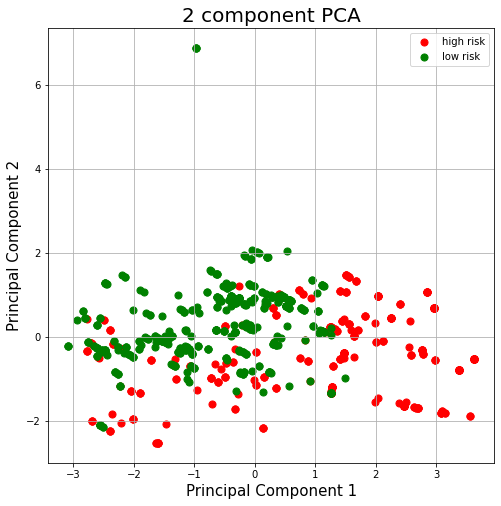

In [96]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['high risk', 'low risk' ]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['RiskLevel'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC 1']
               , finalDf.loc[indicesToKeep, 'PC 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [97]:
x=finalDf[['PC 1','PC 2']]
x.head()
y=finalDf[['RiskLevel']]

le = LabelEncoder()
level = le.fit_transform(y)
y=level



In [98]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [101]:
model = LogisticRegression()
model.fit(x_train, y_train)
pred=model.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred))
r2 = r2_score(y_test,pred)
print("R^2 score:",r2)



Accuracy: 0.8518518518518519
R^2 score: 0.38915946582875105


<font color=green>
Accuracy of Logistic regression with data reduction(2 principle components)is 85%

# Conclusion

<font color=green>
Final Conclusion:

After obseriving all the tests ,Logestic Regression with Regularization performed well with accuracy score of 91% and
recall score of ~96% which is very important in medical field.
 
    
Sucessfully, we have tested all statistical methods on the data set.

# References

Dataset:  https://www.kaggle.com/datasets/drmbsharma/maternal-health-risk-data-set?resource=download
https://www.researchgate.net/publication/361755492_Data_Analysis_Using_Statistical_Methods_Case_Study_of_Categorizing_the_Species_of_Penguin
https://medium.com/analytics-vidhya/statistical-analysis-using-python-e83f10ca3c82